### Getting the data

In [1]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../data"):
    # Return CSV file path given ticker symbol.
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    # Read stock data (adjusted close) for given symbols from CSV files.
    stock_df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', parse_dates = True,
        usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        stock_df = stock_df.join(df_temp)
        if symbol == 'SPY':
            stock_df = stock_df.dropna(subset=['SPY'])
    return stock_df

### Plotting the data

In [2]:
import matplotlib.pyplot as plt

def plot_data(df, title = 'Stock Prices'):
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()    

### Fill missing values (function)

In [5]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill', inplace = True)
    df_data.fillna(method='bfill', inplace = True)


### Fill missing values

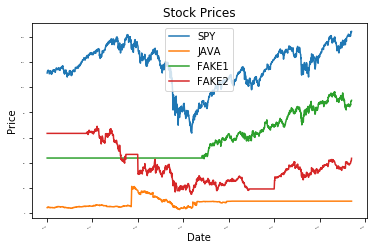

In [6]:
# Read data
symbol_list = ['JAVA', 'FAKE1', 'FAKE2']  # list of symbols
start_date = '2005-12-31'
end_date = '2014-12-07'
dates = pd.date_range(start_date, end_date)  # date range as index
df_data = get_data(symbol_list, dates)  # get data for each symbol

# Fill missing values
fill_missing_values(df_data)

# Plot
plot_data(df_data)